In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Examine the Data

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
insurance.apply(pd.unique)

age         [19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...
sex                                            [female, male]
bmi         [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...
children                                   [0, 1, 3, 2, 5, 4]
smoker                                              [yes, no]
region           [southwest, southeast, northwest, northeast]
charges     [16884.924, 1725.5523, 4449.462, 21984.47061, ...
dtype: object

# Clean the Data

In [8]:
insurance.duplicated().sum()

1

In [9]:
insurance = insurance.drop_duplicates(keep='first')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Task 1
### How is age related to medical costs?

Text(0.5, 1.0, 'Age related to Medical costs')

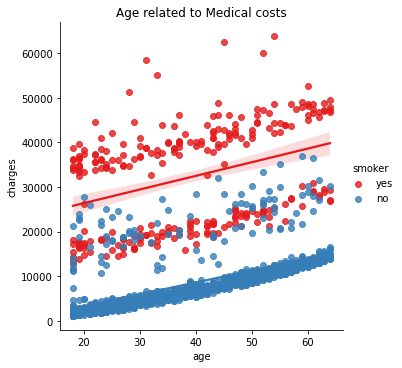

In [10]:
#Plotting a relational plot between age and charges
ax = sns.lmplot(x = 'age', y = 'charges', data = insurance, hue = 'smoker', palette = 'Set1')
plt.title('Age related to Medical costs')

# Task 2
### How is number of children related to medical costs?

Text(0.5, 1.0, 'Number of children related to Medical costs')

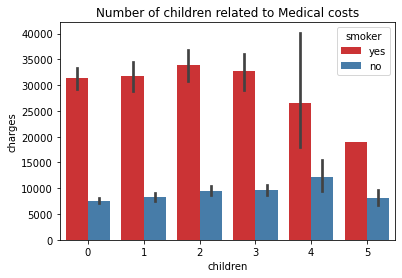

In [11]:
#Plotting a relational plot between children and charges
ax = sns.barplot(x = 'children', y = 'charges', data = insurance, hue = 'smoker', palette = 'Set1')
plt.title('Number of children related to Medical costs')

# Task 3
###  How is the number of people distributed by region?

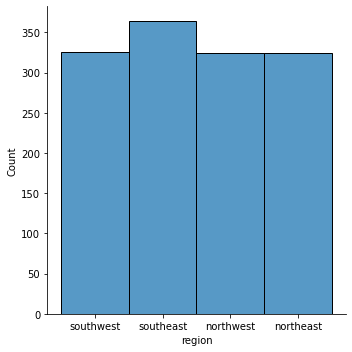

In [12]:
#Plotting a distribution plot by regions
sns.displot(x = 'region', data = insurance)

# Task 4
### How is the number of people distributed by age?

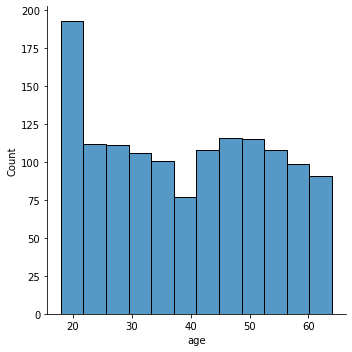

In [13]:
#Plotting a distribution plot by age
sns.displot(x = 'age', data = insurance)

# Task 5
###  How are the charges distributed?

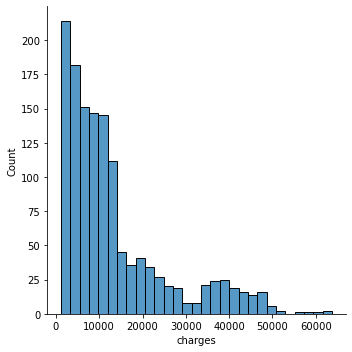

In [14]:
#Plotting a distribution plot by charges
sns.displot(x = 'charges', data = insurance)

# Task 6
### Bin the bmi column. To do that, search the internet to determine how you should bin and label the data.

In [22]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
pd.cut(insurance['bmi'], bins = [0, 18.5, 24.9, 29.9, 34.9, 100], labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremely Obese'])

0            Overweight
1                 Obese
2                 Obese
3         Normal weight
4            Overweight
             ...       
1333              Obese
1334              Obese
1335    Extremely Obese
1336         Overweight
1337         Overweight
Name: bmi, Length: 1337, dtype: category
Categories (5, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese' < 'Extremely Obese']